## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

## Data Loading and Preparation

In [2]:
df = pd.read_csv('data/csv/transport_final_with_sentiment.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['year_month'] = df['date'].dt.to_period('M')

In [4]:
df['keywords_shortened'] = df['keywords_shortened'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) and x != '' else [])

In [5]:
df.head()

,date,topic,text,term,clean_text,bertopic_topic,bertopic_prob,is_bertopic,lda_topic,lda_prob,...,is_shortened,keywords_full,keywords_shortened,num_approaches_agree,is_transport,sentiment,sentiment_score,year,month,year_month
0,1999-04-15,4. Transport infrastructure charging,President . – The next item is the report (A4‐...,94_99,schmidbauer transport tourism white paper enti...,64,1.000000,True,19,0.388259,...,False,"['bus', 'car', 'infrastructure', 'rail', 'road...",[],4,True,neutral,-0.099388,1999,4,1999-04
1,1999-04-15,6. Transport infrastructure charging (continua...,President . – The next item is the continuatio...,94_99,continuation schmidbauer transport tourism whi...,64,0.914965,True,19,0.485889,...,False,"['air transport', 'airport', 'car', 'infrastru...",[],4,True,neutral,-0.032266,1999,4,1999-04
2,1999-04-15,7. Maximum authorised dimensions and weights i...,President . – The next item is the second repo...,94_99,van dam transport tourism directive amending d...,-1,0.000000,False,19,0.487040,...,False,"['bus', 'car', 'freight transport', 'rail', 'r...",[],3,True,negative,-0.164551,1999,4,1999-04
3,1999-03-10,6. VOTES,"Report (A4‐0063/99) by Mrs Hardstaff, on behal...",94_99,hardstaff fisheries communication implementati...,11,0.833863,False,19,0.339341,...,True,"['air transport', 'airport', 'boat', 'bus', 'c...","[air transport, freight transport, passenger t...",3,True,negative,-0.117570,1999,3,1999-03
4,1999-03-09,14. Transportable pressure equipment,President . – The next item is the recommendat...,94_99,recommendation transport tourism common positi...,36,0.658336,True,65,0.568049,...,False,[],[],3,True,positive,0.138031,1999,3,1999-03


In [6]:
# quick overview

print("=== Transport Discussions Overview ===")
print(f"Total transport-related transcripts: {len(df)}")
print(f"Date range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"Unique dates with transport discussions: {df['date'].nunique()}")
print(f"Average transcripts per day (when transport discussed): {len(df) / df['date'].nunique():.2f}")

print(f"\n=== By Parliamentary Term ===")
print(df['term'].value_counts().sort_index())

=== Transport Discussions Overview ===
Total transport-related transcripts: 417
Date range: 1996-04-15 to 2025-06-17
Unique dates with transport discussions: 282
Average transcripts per day (when transport discussed): 1.48

=== By Parliamentary Term ===
term
04_09    107
09_14     73
14_19     86
19_24      6
24_25      7
94_99     56
99_04     82
Name: count, dtype: int64


## Trends over Time

In [7]:
daily_counts = df.groupby('date').size()
monthly_counts = df.groupby('year_month').size()
yearly_counts = df.groupby('year').size()
term_counts = df.groupby('term').size().sort_index()

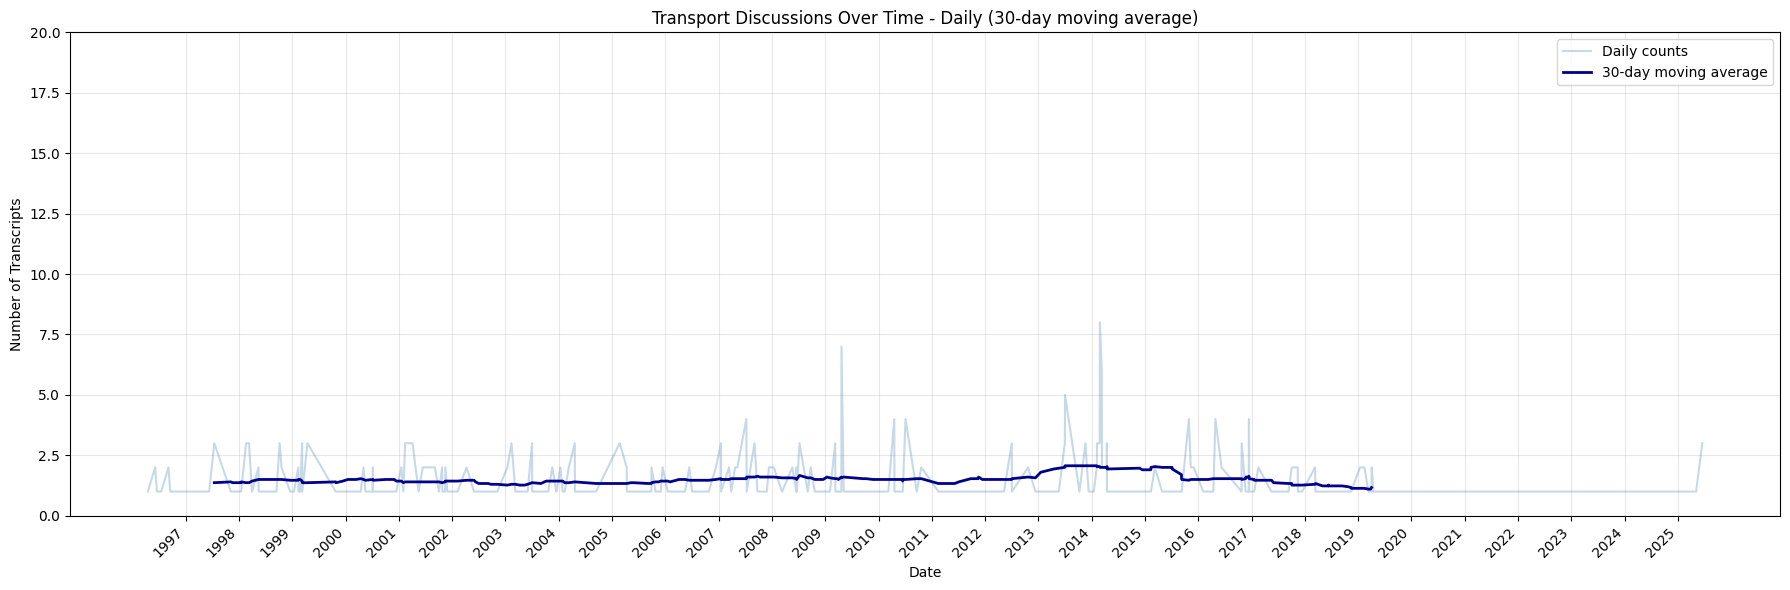

In [8]:
# Daily (smoothed with rolling average)
plt.figure(figsize=(18, 6))
daily_counts.plot(alpha=0.3, color='steelblue', label='Daily counts')
daily_counts.rolling(window=30, center=True).mean().plot(color='darkblue', linewidth=2, label='30-day moving average')
plt.title('Transport Discussions Over Time - Daily (30-day moving average)')
plt.xlabel('Date')
plt.ylabel('Number of Transcripts')
plt.ylim(0, 20)
plt.legend()
plt.grid(alpha=0.3)
years = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='YS')
plt.xticks(years, [year.year for year in years], rotation=45)
plt.tight_layout()
plt.show()

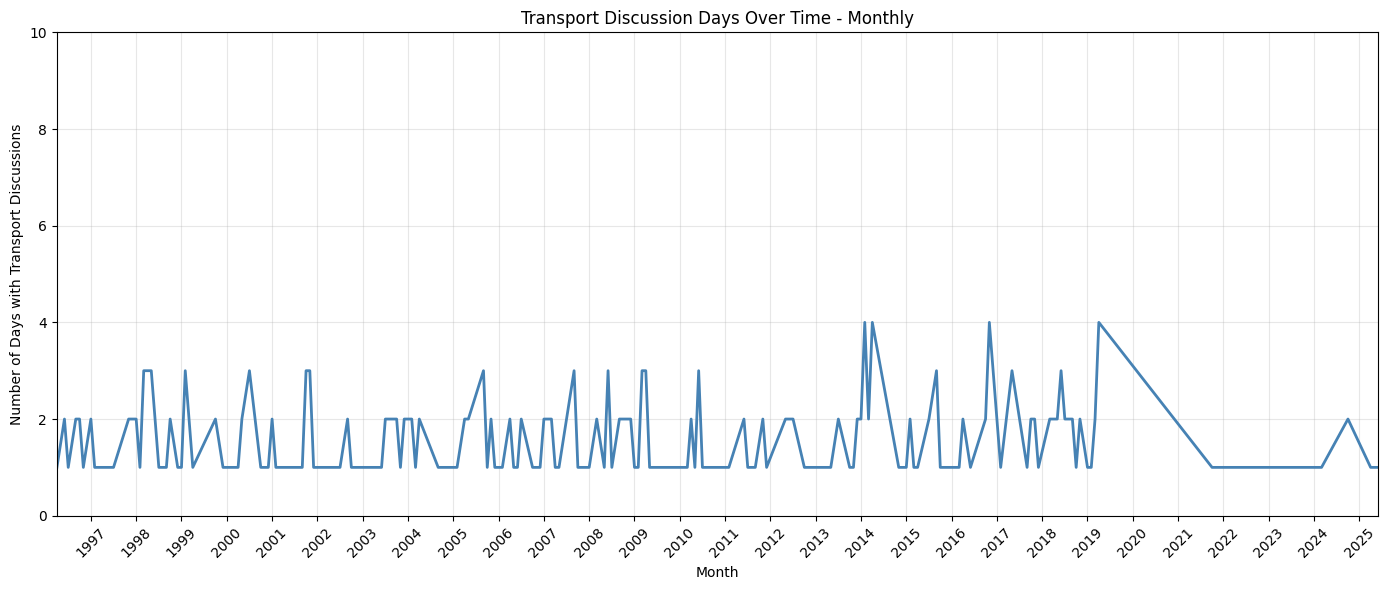

In [9]:
# Monthly
monthly_unique_dates = df.groupby('year_month')['date'].nunique()
plt.figure(figsize=(14, 6))
monthly_unique_dates.plot(kind='line', color='steelblue', linewidth=2)
plt.title('Transport Discussion Days Over Time - Monthly')
plt.xlabel('Month')
plt.ylabel('Number of Days with Transport Discussions')
plt.ylim(0, 10)
plt.grid(alpha=0.3)
years = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='YS')
plt.xticks(years, [year.year for year in years], rotation=45)
plt.tight_layout()
plt.show()

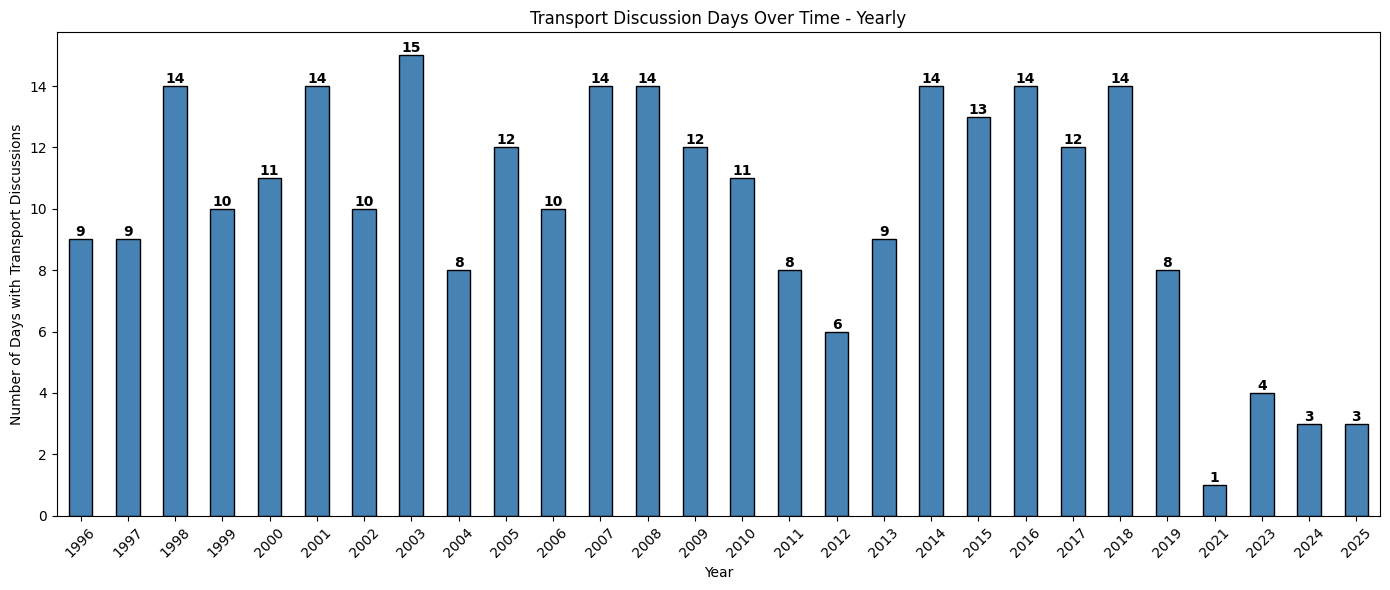

In [30]:
# Yearly
yearly_unique_dates = df.groupby('year')['date'].nunique()
plt.figure(figsize=(14, 6))
yearly_unique_dates.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Transport Discussion Days Over Time - Yearly')
plt.xlabel('Year')
plt.ylabel('Number of Days with Transport Discussions')
plt.xticks(rotation=45)

# Add value labels
for i, v in enumerate(yearly_unique_dates):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

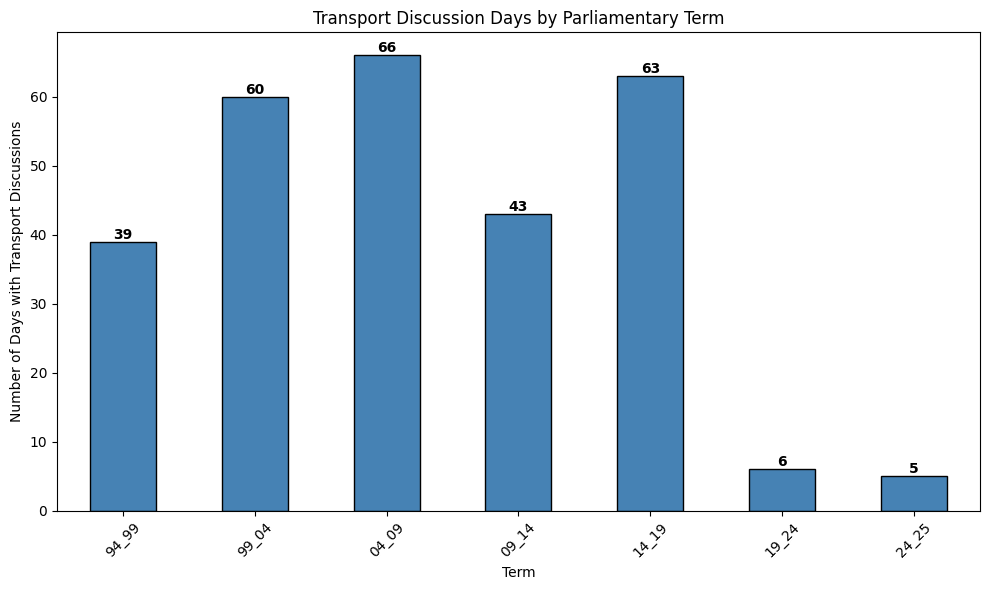

In [33]:
# By Term
term_unique_dates = df.groupby('term')['date'].nunique()

# Sort terms chronologically (94_99, 99_04, 04_09, ...)
term_order = ['94_99', '99_04', '04_09', '09_14', '14_19', '19_24', '24_25']
term_unique_dates = term_unique_dates.reindex(term_order)

plt.figure(figsize=(10, 6))
term_unique_dates.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Transport Discussion Days by Parliamentary Term')
plt.xlabel('Term')
plt.ylabel('Number of Days with Transport Discussions')
plt.xticks(rotation=45)

# Add value labels
for i, v in enumerate(term_unique_dates):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


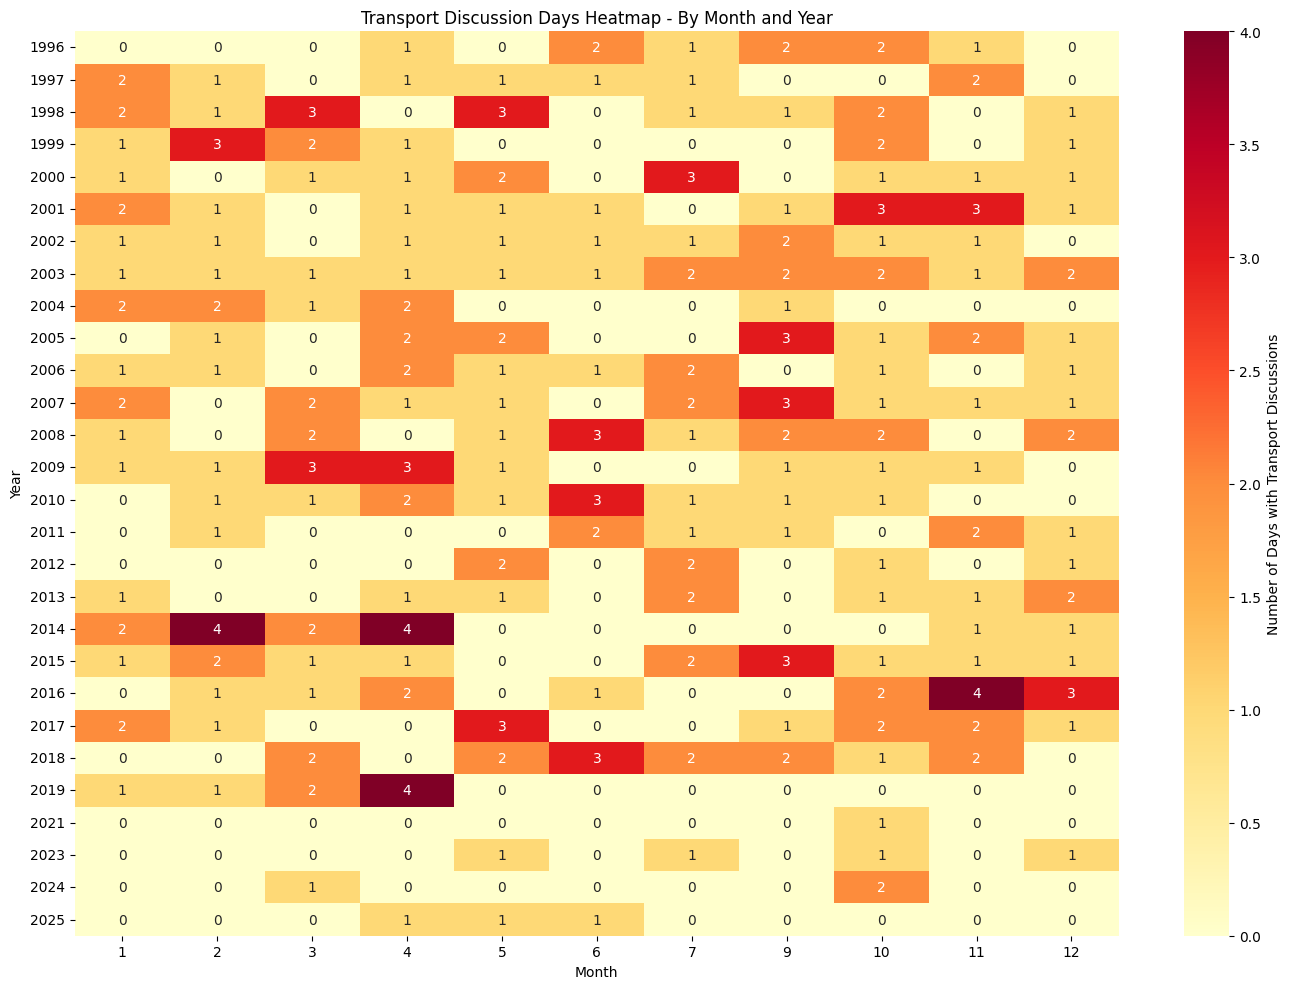

In [36]:
heatmap_data = df.groupby(['year', 'month'])['date'].nunique().unstack(fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d', cbar_kws={'label': 'Number of Days with Transport Discussions'})
plt.title('Transport Discussion Days Heatmap - By Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

## Sentiment Analysis over Time

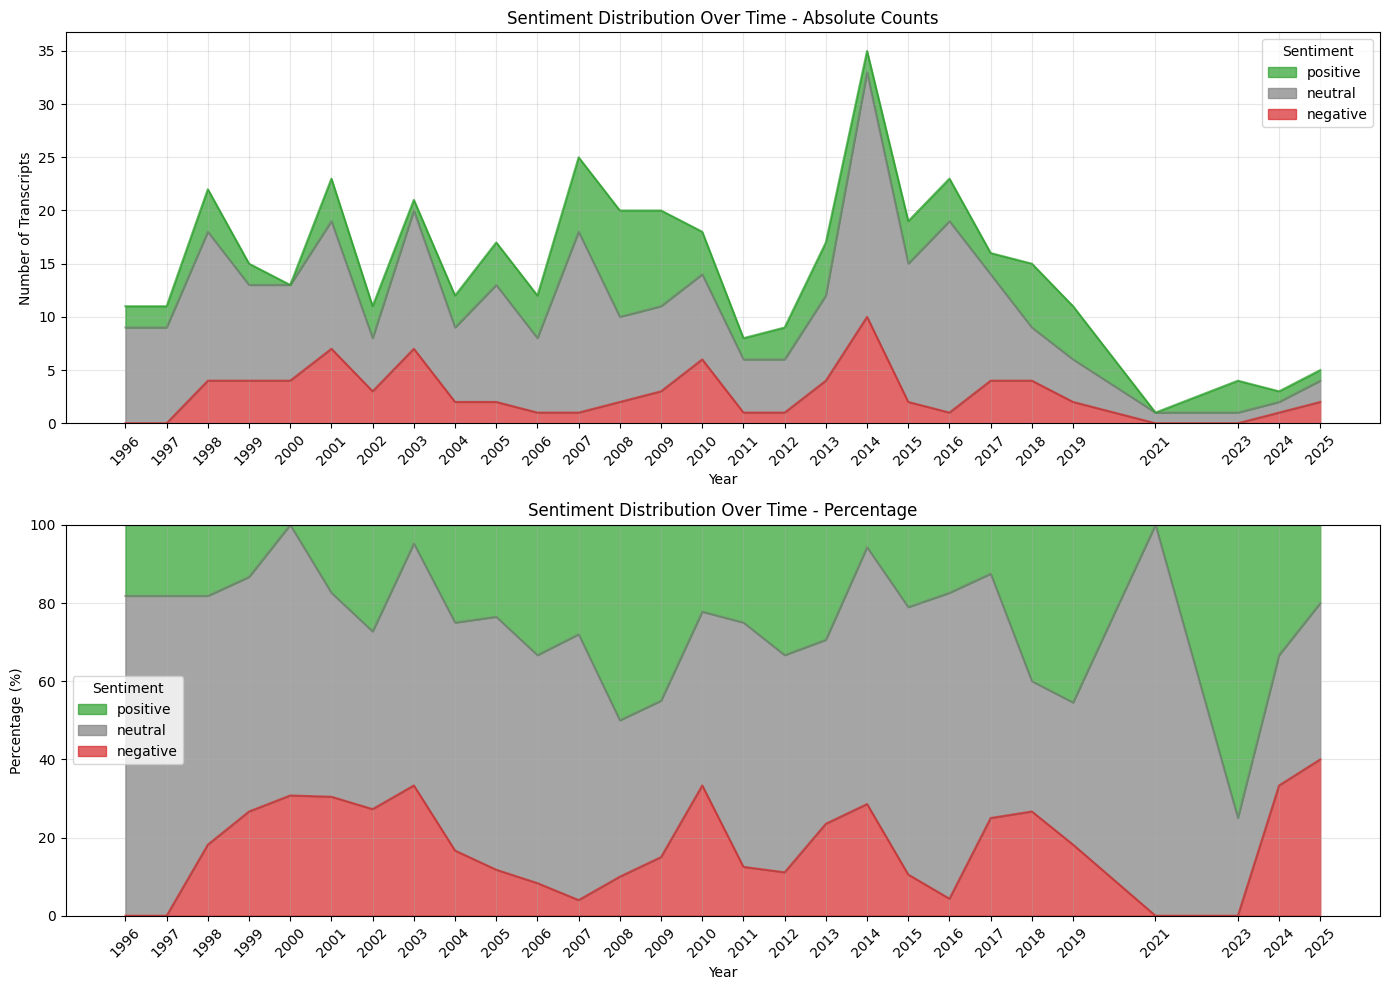

In [ ]:
# sentiment distribution by year
sentiment_by_year = df.groupby(['year', 'sentiment']).size().unstack(fill_value=0)
sentiment_by_year_pct = sentiment_by_year.div(sentiment_by_year.sum(axis=1), axis=0) * 100

# reorder columns: negative, neutral, positive
sentiment_by_year = sentiment_by_year[['negative', 'neutral', 'positive']]
sentiment_by_year_pct = sentiment_by_year_pct[['negative', 'neutral', 'positive']]

# stacked area chart
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# absolute counts
sentiment_by_year.plot(kind='area', stacked=True, ax=axes[0],
                       color=['#d62728', '#7f7f7f', '#2ca02c'], alpha=0.7)
axes[0].set_title('Sentiment Distribution Over Time - Absolute Counts')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Transcripts')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[::-1], labels[::-1], title='Sentiment')  # reverse legend order
axes[0].grid(alpha=0.3)
axes[0].set_xticks(sentiment_by_year.index)
axes[0].set_xticklabels(sentiment_by_year.index, rotation=45)

# percentage
sentiment_by_year_pct.plot(kind='area', stacked=True, ax=axes[1],
                           color=['#d62728', '#7f7f7f', '#2ca02c'], alpha=0.7)
axes[1].set_title('Sentiment Distribution Over Time - Percentage')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_ylim(0, 100)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles[::-1], labels[::-1], title='Sentiment')  # reverse legend order
axes[1].grid(alpha=0.3)
axes[1].set_xticks(sentiment_by_year_pct.index)
axes[1].set_xticklabels(sentiment_by_year_pct.index, rotation=45)

plt.tight_layout()
plt.show()

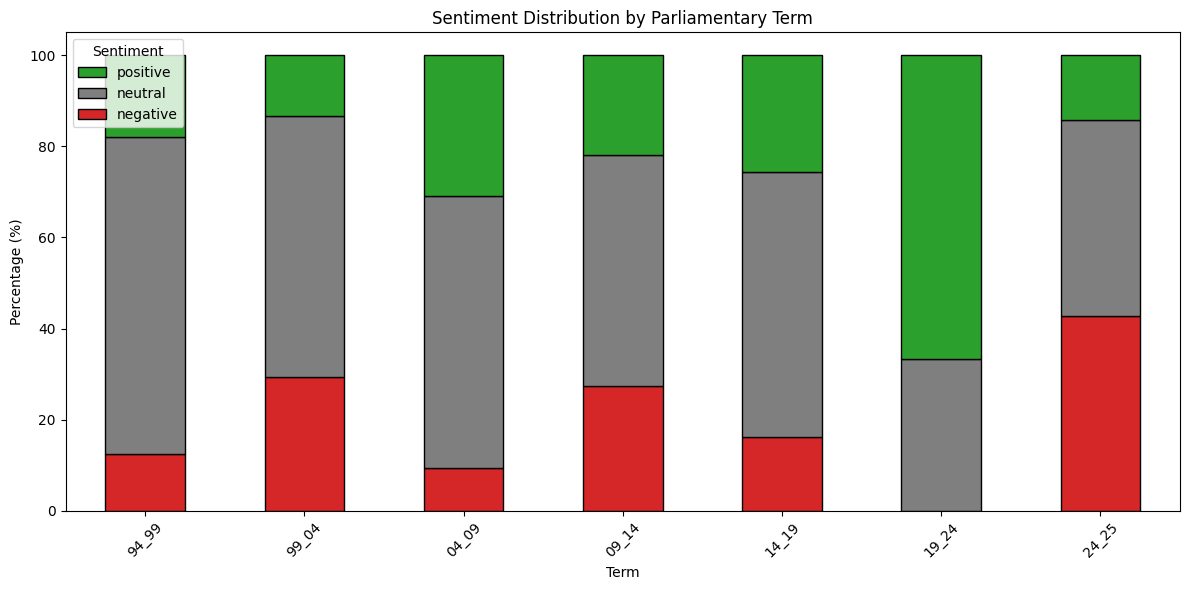

In [ ]:
# Sentiment by term
sentiment_by_term = df.groupby(['term', 'sentiment']).size().unstack(fill_value=0)
sentiment_by_term_pct = sentiment_by_term.div(sentiment_by_term.sum(axis=1), axis=0) * 100

sentiment_by_term_pct = sentiment_by_term_pct[['negative', 'neutral', 'positive']]
term_order = ['94_99', '99_04', '04_09', '09_14', '14_19', '19_24', '24_25']
sentiment_by_term_pct = sentiment_by_term_pct.reindex(term_order)

sentiment_by_term_pct.plot(kind='bar', stacked=True, figsize=(12, 6),
                           color=['#d62728', '#7f7f7f', '#2ca02c'], edgecolor='black')
plt.title('Sentiment Distribution by Parliamentary Term')
plt.xlabel('Term')
plt.ylabel('Percentage (%)')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title='Sentiment')  # reverse legend order
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Keyword Analysis


=== Top 20 Most Frequent Keywords ===
road transport                          :  112
transport system                        :  104
rail transport                          :   98
freight transport                       :   81
public transport                        :   78
transport infrastructure                :   70
passenger transport                     :   67
trans european transport network        :   57
transport mode                          :   56
air transport                           :   53
sustainable transport                   :   53
road safety                             :   47
sustainable mobility                    :   47
greenhouse gas emission                 :   46
road network                            :   45
maritime transport                      :   42
traffic management                      :   40
railway transport                       :   38
intelligent transport system            :   28
passenger car                           :   24


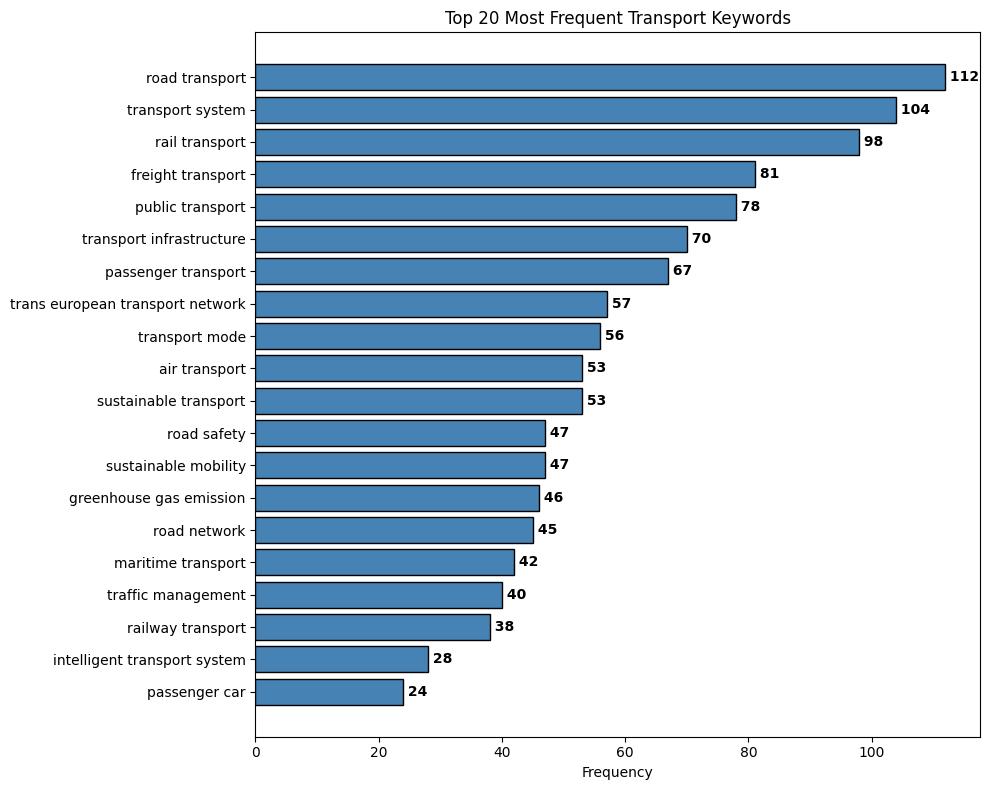

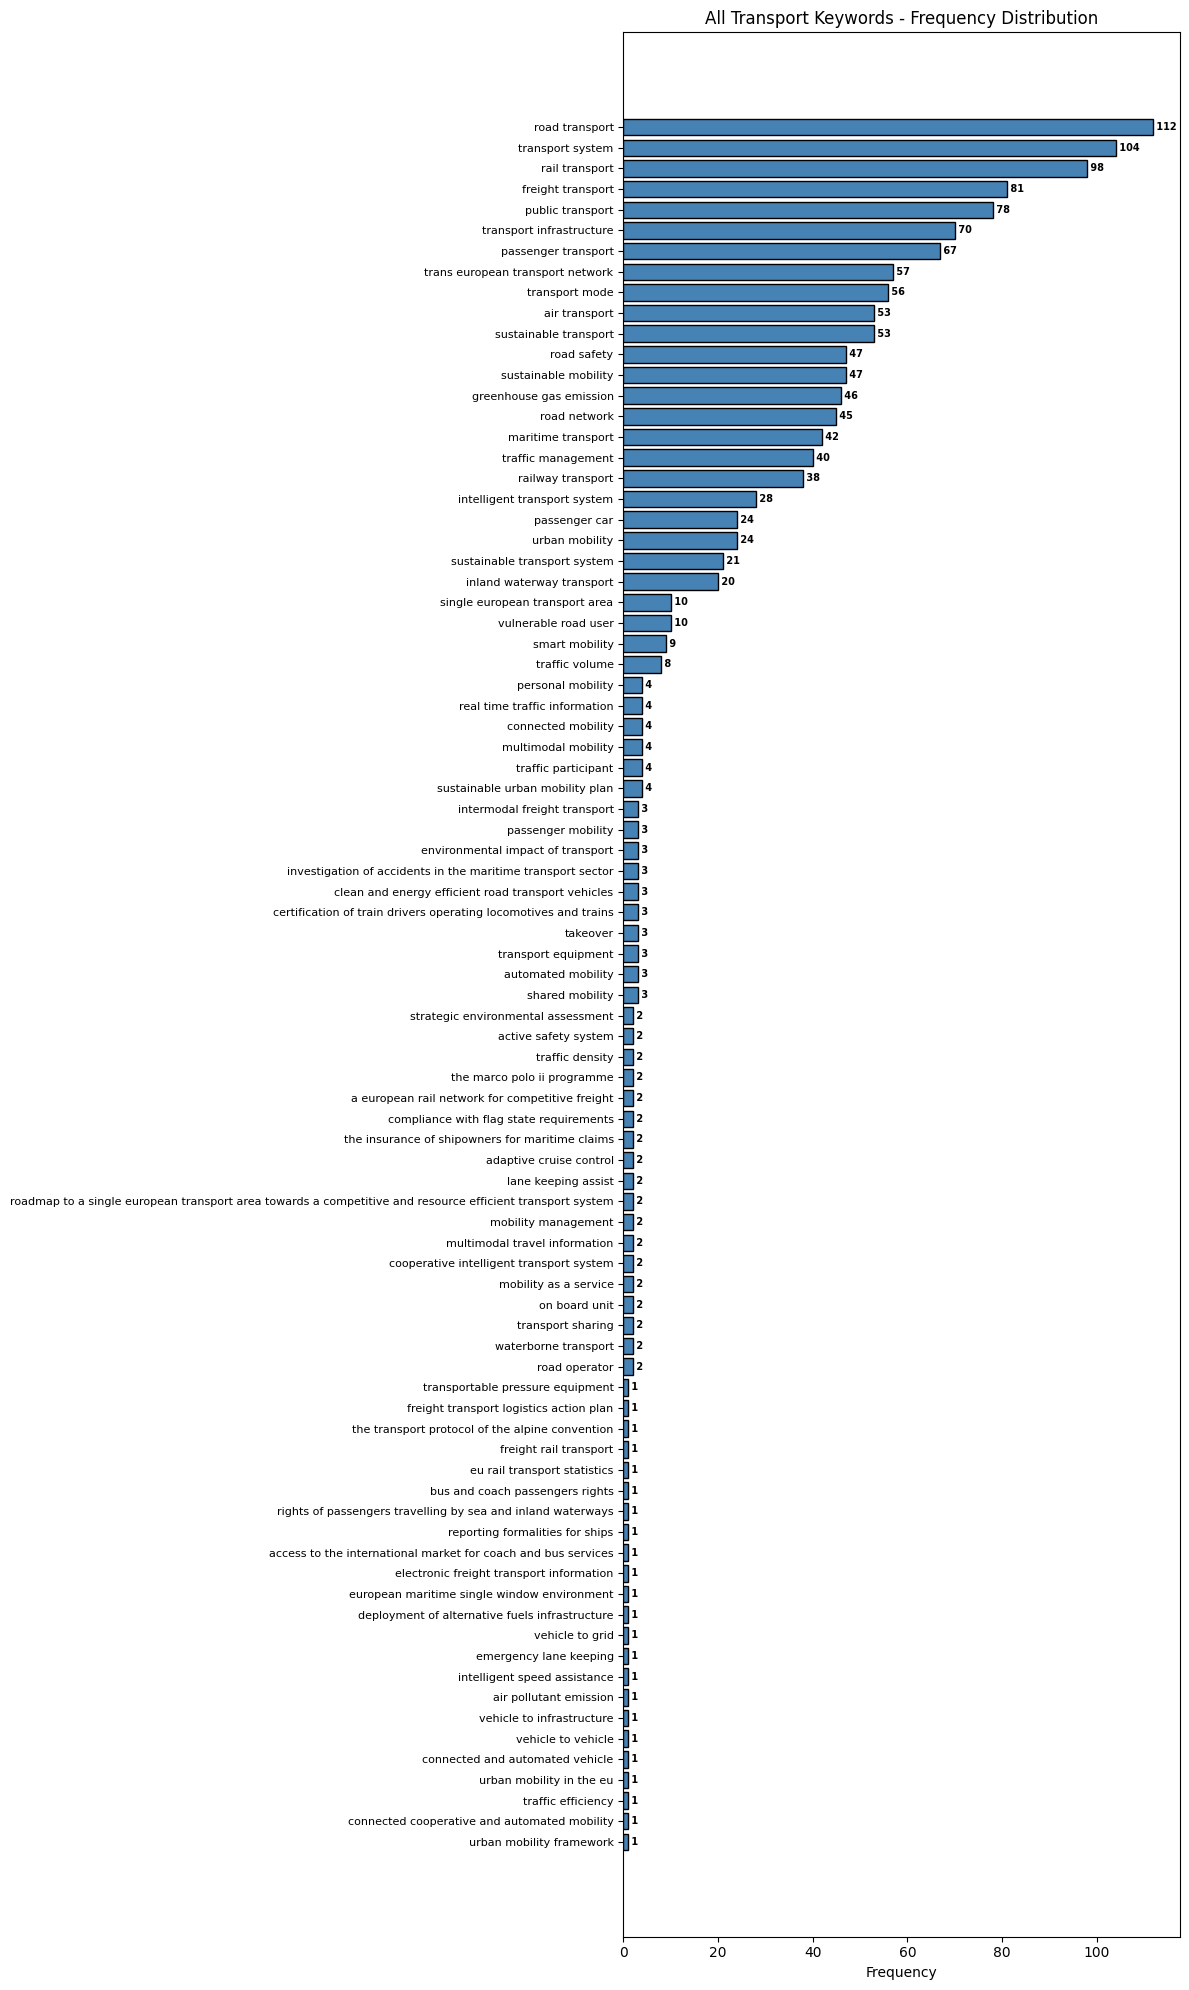

In [48]:
# Extract all keywords
all_keywords = []
for keywords in df['keywords_shortened']:
    all_keywords.extend(keywords)

keyword_counts = Counter(all_keywords)
top_20_keywords = keyword_counts.most_common(20)
all_keywords_sorted = keyword_counts.most_common()

print("\n=== Top 20 Most Frequent Keywords ===")
for keyword, count in top_20_keywords:
    print(f"{keyword:40s}: {count:4d}")

# show just top 20
keywords, counts = zip(*top_20_keywords)
plt.figure(figsize=(10, 8))
plt.barh(range(len(keywords)), counts, color='steelblue', edgecolor='black')
plt.yticks(range(len(keywords)), keywords)
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Transport Keywords')
plt.gca().invert_yaxis()

# add value labels
for i, v in enumerate(counts):
    plt.text(v, i, f' {v}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# show all keywords
all_keywords_list, all_counts = zip(*all_keywords_sorted)
plt.figure(figsize=(12, 20))
plt.barh(range(len(all_keywords_list)), all_counts, color='steelblue', edgecolor='black')
plt.yticks(range(len(all_keywords_list)), all_keywords_list, fontsize=8)
plt.xlabel('Frequency')
plt.title('All Transport Keywords - Frequency Distribution')
plt.gca().invert_yaxis()

# add value labels
for i, v in enumerate(all_counts):
    plt.text(v, i, f' {v}', va='center', fontsize=7, fontweight='bold')

plt.tight_layout()
plt.show()

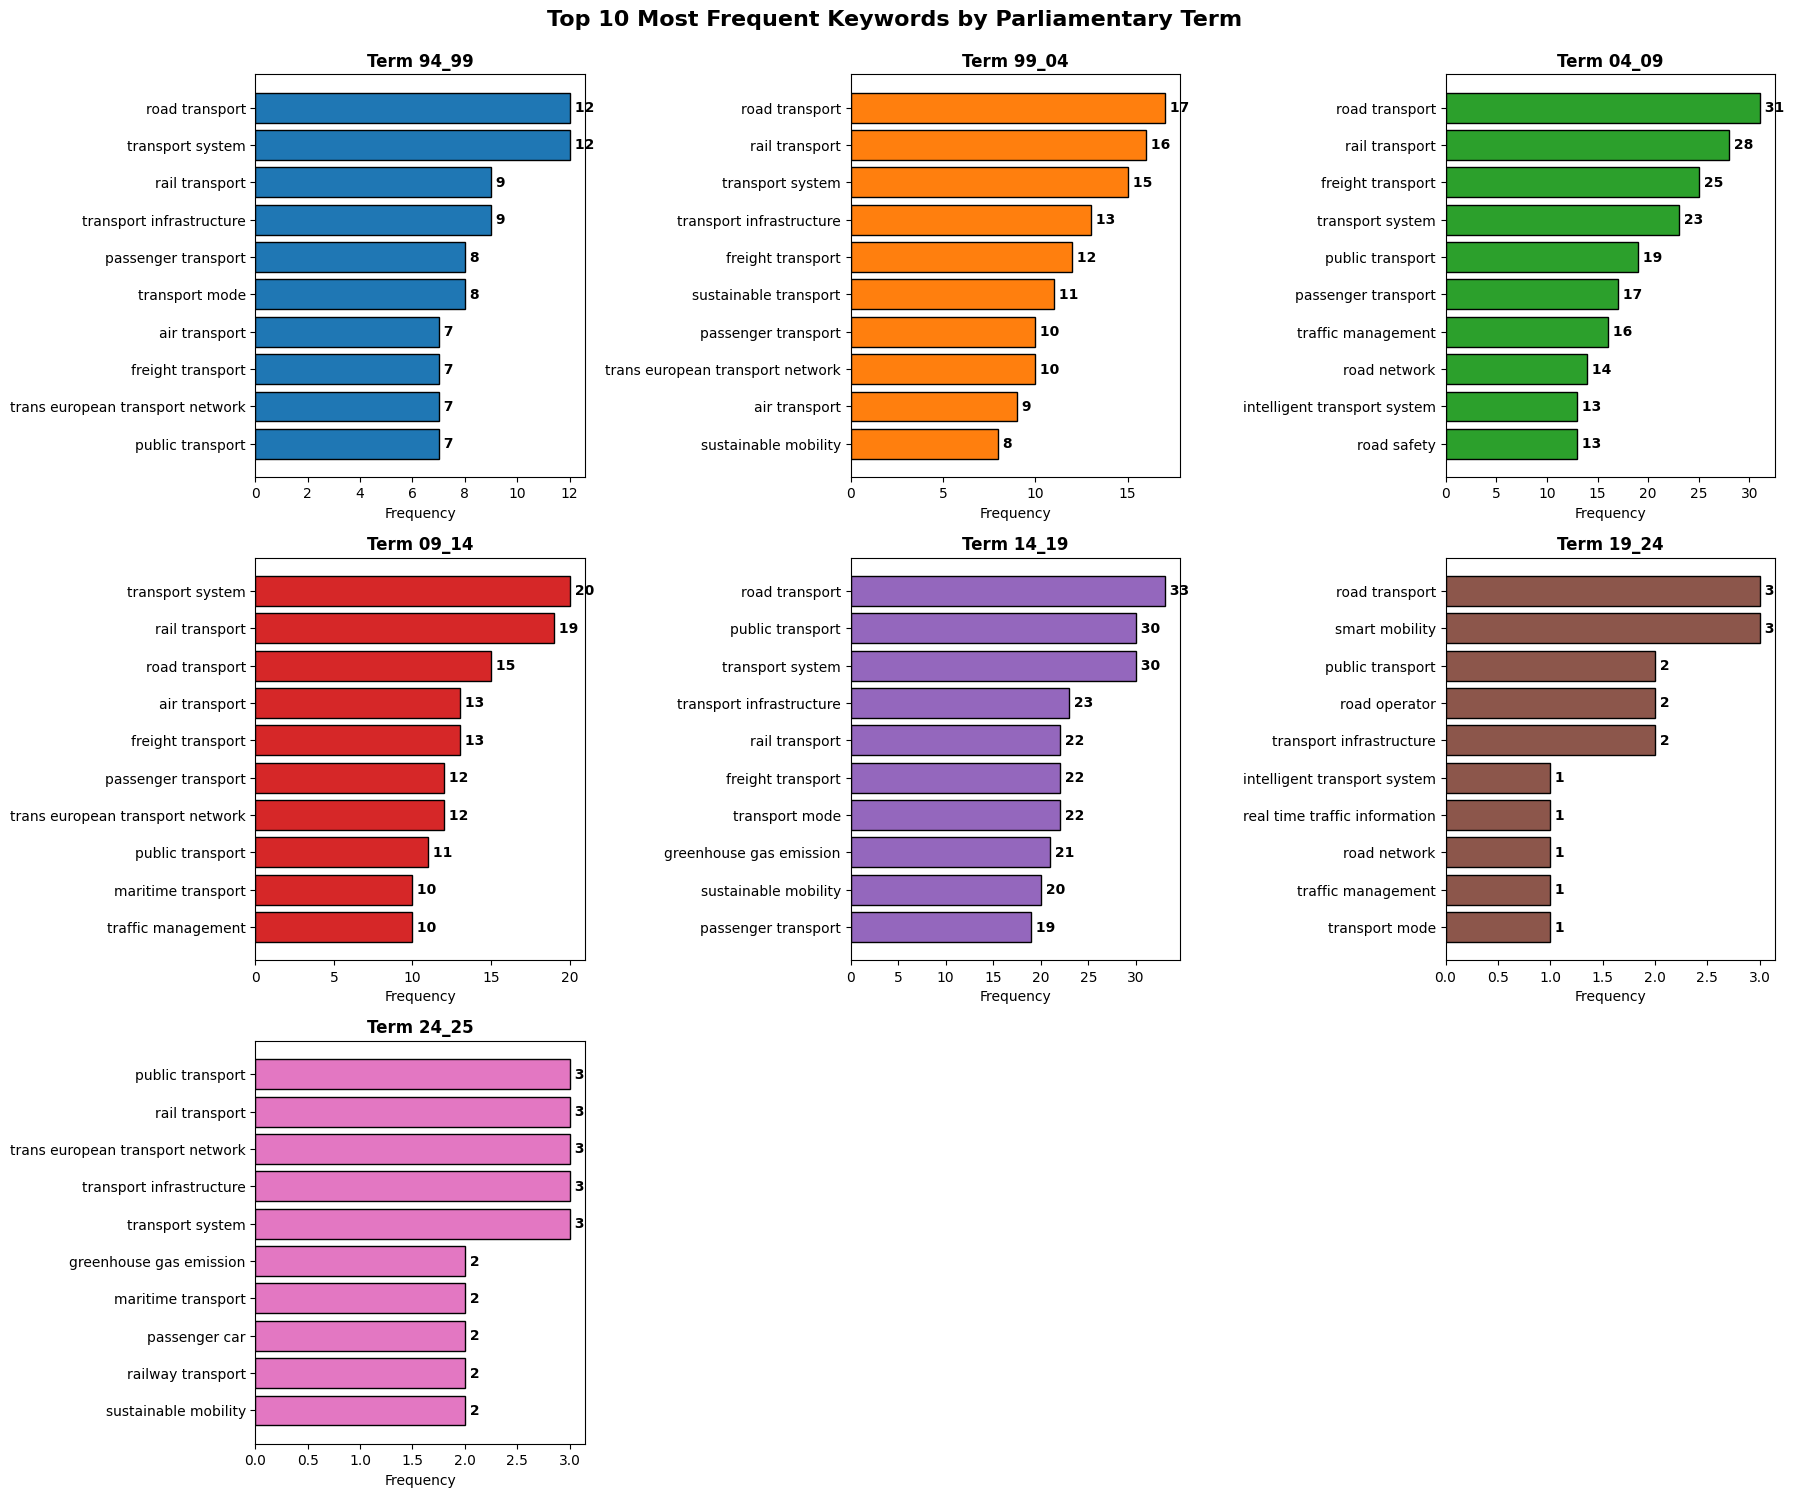

In [ ]:
# Extract keywords by term
term_order = ['94_99', '99_04', '04_09', '09_14', '14_19', '19_24', '24_25']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for idx, (term, color) in enumerate(zip(term_order, colors)):
    term_df = df[df['term'] == term]
    
    term_keywords = []
    for keywords in term_df['keywords_shortened']:
        term_keywords.extend(keywords)
    
    term_keyword_counts = Counter(term_keywords)
    top_10 = term_keyword_counts.most_common(10)
    
    if top_10:
        keywords, counts = zip(*top_10)
        
        axes[idx].barh(range(len(keywords)), counts, color=color, edgecolor='black')
        axes[idx].set_yticks(range(len(keywords)))
        axes[idx].set_yticklabels(keywords)
        axes[idx].set_xlabel('Frequency')
        axes[idx].set_title(f'Term {term}', fontweight='bold')
        axes[idx].invert_yaxis()
        
        for i, v in enumerate(counts):
            axes[idx].text(v, i, f' {v}', va='center', fontweight='bold')

axes[7].axis('off')
axes[8].axis('off')

plt.suptitle('Top 10 Most Frequent Keywords by Parliamentary Term', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## Keyword vs Sentiment

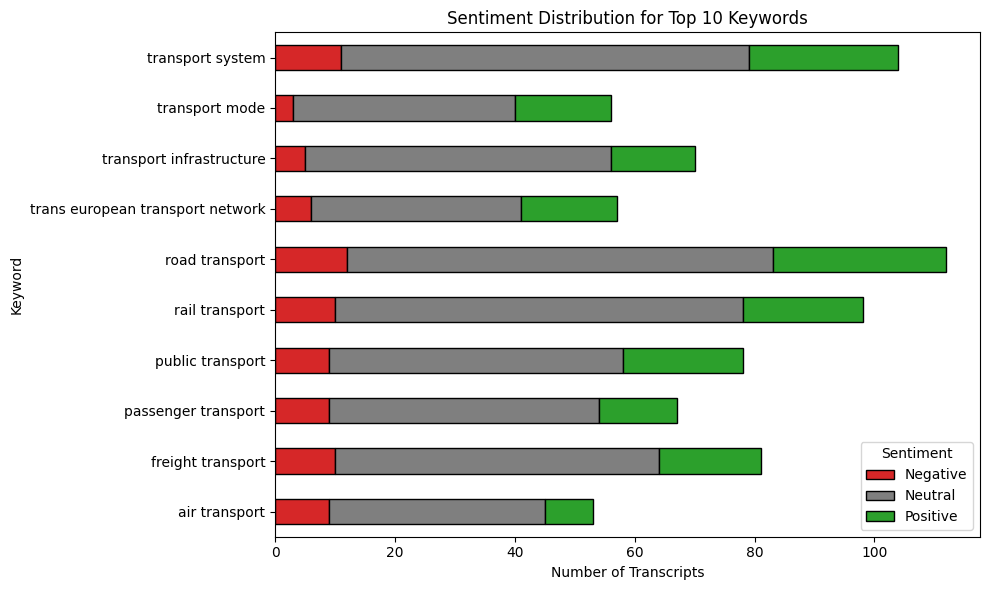

In [50]:
# Sentiment distribution for top keywords
top_10_keywords = [kw for kw, _ in keyword_counts.most_common(10)]

keyword_sentiment_data = []
for keyword in top_10_keywords:
    keyword_df = df[df['keywords_shortened'].apply(lambda x: keyword in x)]
    for sentiment in ['negative', 'neutral', 'positive']:
        count = (keyword_df['sentiment'] == sentiment).sum()
        keyword_sentiment_data.append({
            'keyword': keyword,
            'sentiment': sentiment,
            'count': count
        })

keyword_sentiment_df = pd.DataFrame(keyword_sentiment_data)
keyword_sentiment_pivot = keyword_sentiment_df.pivot(index='keyword', columns='sentiment', values='count').fillna(0)

keyword_sentiment_pivot.plot(kind='barh', stacked=True, figsize=(10, 6),
                             color=['#d62728', '#7f7f7f', '#2ca02c'], edgecolor='black')
plt.title('Sentiment Distribution for Top 10 Keywords')
plt.xlabel('Number of Transcripts')
plt.ylabel('Keyword')
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
plt.tight_layout()
plt.show()

## Final Summary

In [51]:
summary_stats = {
    "Total transport transcripts": len(df),
    "Date range": f"{df['date'].min().date()} to {df['date'].max().date()}",
    "Unique dates": df['date'].nunique(),
    "Avg transcripts per day": round(len(df) / df['date'].nunique(), 2),
    "Most active year": df['year'].value_counts().idxmax(),
    "Most active term": df['term'].value_counts().idxmax(),
    "Sentiment - Positive": f"{(df['sentiment'] == 'positive').sum()} ({(df['sentiment'] == 'positive').sum() / len(df) * 100:.1f}%)",
    "Sentiment - Neutral": f"{(df['sentiment'] == 'neutral').sum()} ({(df['sentiment'] == 'neutral').sum() / len(df) * 100:.1f}%)",
    "Sentiment - Negative": f"{(df['sentiment'] == 'negative').sum()} ({(df['sentiment'] == 'negative').sum() / len(df) * 100:.1f}%)",
    "Total unique keywords": len(keyword_counts),
    "Top 5 keywords": ', '.join([kw for kw, _ in keyword_counts.most_common(5)])
}

print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
for key, value in summary_stats.items():
    print(f"{key:30s}: {value}")
print("="*60)

with open('data/summary_statistics.txt', 'w') as f:
    f.write("TRANSPORT DISCUSSIONS - SUMMARY STATISTICS\n")
    f.write("="*60 + "\n\n")
    for key, value in summary_stats.items():
        f.write(f"{key:30s}: {value}\n")

print("\nSummary saved to: data/summary_statistics.txt")


SUMMARY STATISTICS
Total transport transcripts   : 417
Date range                    : 1996-04-15 to 2025-06-17
Unique dates                  : 282
Avg transcripts per day       : 1.48
Most active year              : 2014
Most active term              : 04_09
Sentiment - Positive          : 97 (23.3%)
Sentiment - Neutral           : 242 (58.0%)
Sentiment - Negative          : 78 (18.7%)
Total unique keywords         : 84
Top 5 keywords                : road transport, transport system, rail transport, freight transport, public transport

Summary saved to: data/summary_statistics.txt
